In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("extracted_features_charrec_dense7.csv")
data


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,class_name
0,27.630783,0.000000,51.067493,0.0,26.302004,0.000000,0.000000,0.0,0.0,0.000000,...,35.563477,8.822042,0.0,18.269510,82.596970,0.000000,0.000000,1.751286,0.0,3333
1,41.934185,0.000000,57.616398,0.0,40.345722,0.000000,0.000000,0.0,0.0,0.000000,...,33.432617,22.573324,0.0,25.266916,71.188900,0.000000,0.000000,0.000000,0.0,3333
2,59.681458,0.000000,35.450397,0.0,51.084698,0.000000,0.000000,0.0,0.0,4.531399,...,17.747238,22.295591,0.0,9.600313,39.380276,0.000000,0.000000,13.358544,0.0,3333
3,25.652845,0.000000,42.711246,0.0,26.391441,0.000000,0.000000,0.0,0.0,0.000000,...,25.998358,12.029038,0.0,19.127953,60.226376,0.000000,0.000000,0.000000,0.0,3333
4,51.862490,0.000000,25.455917,0.0,48.505250,0.000000,0.000000,0.0,0.0,0.000000,...,27.024067,1.758605,0.0,17.696215,64.634834,0.000000,0.000000,9.861172,0.0,3333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6652,0.000000,8.917019,12.606703,0.0,0.000000,23.875010,0.000000,0.0,0.0,9.403310,...,0.000000,9.477231,0.0,0.000000,46.723995,0.000000,20.901190,7.003646,0.0,3454
6653,12.088920,3.646342,28.106102,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,38.677414,0.000000,1.824834,7.562943,0.0,3454
6654,0.000000,0.000000,53.899130,0.0,0.000000,0.000000,12.079654,0.0,0.0,0.000000,...,12.388772,58.245360,0.0,0.000000,47.787598,5.880453,0.000000,3.556168,0.0,3454
6655,0.000000,0.000000,37.811558,0.0,0.000000,0.000000,8.555406,0.0,0.0,0.000000,...,7.663426,23.674717,0.0,0.000000,53.260387,3.350826,0.000000,8.673196,0.0,3454


In [3]:
#1
np.dot(data["0"],data["45"])

113.88492503658134

In [4]:
#1
np.linalg.norm(data["0"])

2435.502005891182

In [7]:
#1
class_A_data = data[data['class_name'] == 3334]
class_B_data = data[data['class_name'] == 3335]
cent_A = np.mean(class_A_data, axis=0)
cent_B = np.mean(class_B_data, axis=0)
print(cent_A)
cent_B


0               31.041534
1                0.309216
2                9.149055
3                0.007348
4               37.098322
                 ...     
60               0.015213
61               0.098929
62              16.328774
63               0.000000
class_name    3334.000000
Length: 65, dtype: float64


0               33.954744
1                7.803311
2                0.929065
3                0.000000
4               48.753925
                 ...     
60               0.035407
61               5.166118
62              24.849326
63               0.000000
class_name    3335.000000
Length: 65, dtype: float64

In [8]:
cent_A = np.std(class_A_data,axis=0)
cent_B = np.std(class_B_data,axis=0)
print(cent_A)
cent_B

0             14.335537
1              1.235295
2             10.245662
3              0.085372
4             17.987949
                ...    
60             0.155484
61             0.817670
62             8.022698
63             0.000000
class_name     0.000000
Length: 65, dtype: float64


0             14.117133
1              4.608137
2              4.158898
3              0.000000
4             21.907818
                ...    
60             0.435084
61             6.307505
62            10.803543
63             0.000000
class_name     0.000000
Length: 65, dtype: float64

In [10]:
cent_dist = np.linalg.norm(cent_A - cent_B)
cent_dist

32.2593893920739

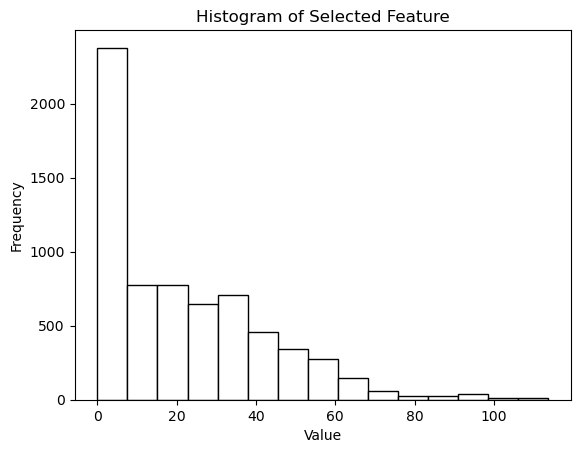

In [11]:
#2
import matplotlib.pyplot as plt

selected_feature = data['0']
num_bins =15
hist, bins = np.histogram(selected_feature, bins=num_bins)

plt.hist(selected_feature, bins=num_bins,  color='w', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Selected Feature')
plt.show()


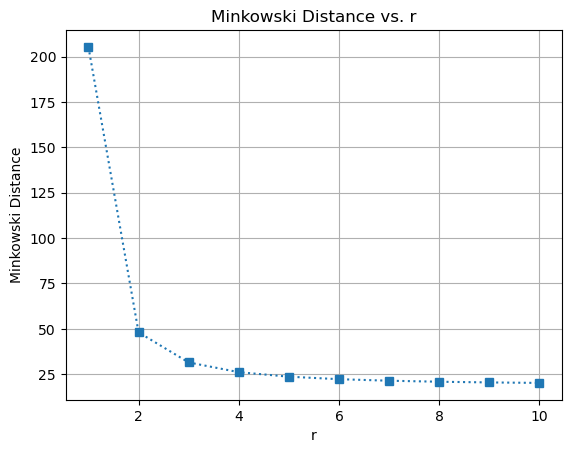

In [13]:
#3
vector1 = data.iloc[0, :]  
vector2 = data.iloc[1, :]  
distances = []
r_values = list(range(1, 11))
for r in r_values:
    distance = np.power(np.sum(np.abs(vector1 - vector2) ** r), 1/r)
    distances.append(distance)

plt.plot(r_values, distances, marker='s', linestyle=':')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs. r')
plt.grid(True)
plt.show()

In [76]:
#4
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [77]:
y_test

1341    3350
71      3333
937     3346
5087    3375
2013    3355
        ... 
4355    3368
2498    3359
2381    3358
221     3334
4668    3371
Name: class_name, Length: 1998, dtype: int64

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

dt=pd.read_csv("extracted_features_charrec_dense7.csv")
print(dt)
dt.shape

              0         1          2    3          4          5          6  \
0     27.630783  0.000000  51.067493  0.0  26.302004   0.000000   0.000000   
1     41.934185  0.000000  57.616398  0.0  40.345722   0.000000   0.000000   
2     59.681458  0.000000  35.450397  0.0  51.084698   0.000000   0.000000   
3     25.652845  0.000000  42.711246  0.0  26.391441   0.000000   0.000000   
4     51.862490  0.000000  25.455917  0.0  48.505250   0.000000   0.000000   
...         ...       ...        ...  ...        ...        ...        ...   
6652   0.000000  8.917019  12.606703  0.0   0.000000  23.875010   0.000000   
6653  12.088920  3.646342  28.106102  0.0   0.000000   0.000000   0.000000   
6654   0.000000  0.000000  53.899130  0.0   0.000000   0.000000  12.079654   
6655   0.000000  0.000000  37.811558  0.0   0.000000   0.000000   8.555406   
6656   0.000000  0.000000  29.105694  0.0   0.000000   8.669491  20.568624   

        7    8         9  ...         55         56   57       

(6657, 65)

In [81]:

data = np.genfromtxt("extracted_features_charrec_dense7.csv", delimiter=',', skip_header=1)

# Extract feature vectors and class labels
X = data[:, :-1]
y = data[:, -1]

np.savez('extracted_features_charrec_dense7.npz', X=X, y=y)


In [27]:
np.unique(data)

array([0.0000000e+00, 3.4163892e-04, 4.6131015e-04, ..., 3.4520000e+03,
       3.4530000e+03, 3.4540000e+03])

In [28]:
zero_rows_mask = (data==0).any(axis=1)
class1= data[zero_rows_mask]
class1

array([[2.7630783e+01, 0.0000000e+00, 5.1067493e+01, ..., 1.7512865e+00,
        0.0000000e+00, 3.3330000e+03],
       [4.1934185e+01, 0.0000000e+00, 5.7616398e+01, ..., 0.0000000e+00,
        0.0000000e+00, 3.3330000e+03],
       [5.9681458e+01, 0.0000000e+00, 3.5450397e+01, ..., 1.3358544e+01,
        0.0000000e+00, 3.3330000e+03],
       ...,
       [0.0000000e+00, 0.0000000e+00, 5.3899130e+01, ..., 3.5561680e+00,
        0.0000000e+00, 3.4540000e+03],
       [0.0000000e+00, 0.0000000e+00, 3.7811558e+01, ..., 8.6731960e+00,
        0.0000000e+00, 3.4540000e+03],
       [0.0000000e+00, 0.0000000e+00, 2.9105694e+01, ..., 1.0945368e+01,
        0.0000000e+00, 3.4540000e+03]])

In [30]:
one_rows_mask = (data == 3.4540000e+03).any(axis=1)
class2=data[one_rows_mask]
class2

array([[   0.       ,    3.5745394,   31.44596  , ...,    0.       ,
           0.       , 3454.       ],
       [   0.       ,    9.891518 ,   17.99879  , ...,    0.       ,
           0.       , 3454.       ],
       [   0.       ,    9.891518 ,   17.99879  , ...,    0.       ,
           0.       , 3454.       ],
       ...,
       [   0.       ,    0.       ,   53.89913  , ...,    3.556168 ,
           0.       , 3454.       ],
       [   0.       ,    0.       ,   37.811558 , ...,    8.673196 ,
           0.       , 3454.       ],
       [   0.       ,    0.       ,   29.105694 , ...,   10.945368 ,
           0.       , 3454.       ]])

In [31]:
#5
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split



X = data[:, :-1]
y = data[:, -1]

\
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)# Split data into training and testing sets

neigh = KNeighborsClassifier(n_neighbors=3)# Create kNN classifier with k=3
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)